<a href="https://colab.research.google.com/github/COMM599-Fall2023/fall_2023/blob/yueqihua-final-project/student%20folders/yueqihua/final/archived_game_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game Reviews (Archived)

---

*Scraping Steam game reviews of the games in the games dataset and conducting linear regression analysis with the scraped reviews*

*   Input: game_data.csv
*   Output: game_review_data.csv

## Install dependencies, import modules, input credentials

In [ ]:
!pip install pandas
!pip install --upgrade scikit-learn
!pip install umap-learn

In [ ]:
import pandas as pd
import requests
from datetime import datetime
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

### Scraping Steam games reviews

In [ ]:
### optional: uncomment and load dataset instead of scraping, then you can skip the scraping part
# review_df = pd.read_csv("datasets/game_review_data.csv", encoding='utf-8-sig', index_col=0)
# review_df['appid'] = review_df['appid'].astype(str)

In [ ]:
# getting Steam game appids so we can use it to scrape game reviews from the ids

# loading dataset
game_data_df = pd.read_csv("datasets/game_data.csv", encoding='utf-8-sig', index_col=0)

appids = game_data_df['appid'].astype(str).tolist()

print(len(appids))

1040


In [ ]:
# function to get n reviews of a game on steam

def get_game_reviews(appid, n = 100) :
    url = "https://store.steampowered.com/appreviews/"
    cursor = '*'
    params = {
        'json' : 1,
        'language' : 'english',
        'day_range' : 9223372036854775807, # disclaimer: the documentations says the max value is 365 but this somehow works for getting reviews from more than a year ago
        'num_per_page' : 100,
        'cursor' : cursor
    }

    reviews_data = []

    while n > len(reviews_data) :
        try :
            response = requests.get(url+appid, params=params, timeout=15)
            response.raise_for_status()

            result = response.json()

            cursor = result['cursor']

            query_summary = result['query_summary']
            review_score_desc = query_summary['review_score_desc']
            total_positive = query_summary['total_positive']

            if len(result['reviews']) == 0 :
                break

            for review in result['reviews'] : # [:n]
                created_at = datetime.utcfromtimestamp(review['timestamp_created'])
                updated_at = datetime.utcfromtimestamp(review['timestamp_updated'])
                time_period = updated_at.strftime("%Y-%m")

                review_data = {
                    'appid' : appid,
                    'recommendationid' : review['recommendationid'],
                    'reviewerid' : review['author']['steamid'],
                    'created_at' : created_at,
                    'updated_at' : updated_at,
                    'time_period' : time_period,
                    'review' : review['review'],
                    'playtime_at_review' : review['author']['playtime_at_review'],
                    'playtime_forever' : review['author']['playtime_forever'],
                    'voted_up' : review['voted_up'],
                    'weighted_score' : review['weighted_vote_score'],
                    'steam_purchase' : review['steam_purchase'],
                    'received_for_free' : review['received_for_free']
                }

                reviews_data.append(review_data)
        except :
            print(f"Request failed.")
            return None

    return reviews_data[:n]

In [ ]:
# this takes around 30 minutes

review_data_list = []

count = 0
for appid in tqdm(appids, desc="Getting reviews") :
    reviews_data = get_game_reviews(appid, n=100)

    if reviews_data is None :
        continue
    else :
        review_data_list.extend(reviews_data)

        count += 1
        if count % 25 == 0 :
            print(f"Scraped {count} games. Sleeping for 30 seconds...")
            time.sleep(30)

review_df = pd.DataFrame(review_data_list)

review_df

Getting reviews:   2%|▏         | 17/1040 [00:11<09:46,  1.75it/s]

Request failed.


Getting reviews:   2%|▏         | 20/1040 [00:12<08:44,  1.94it/s]

Request failed.


Getting reviews:   2%|▎         | 26/1040 [00:16<10:15,  1.65it/s]

Request failed.


Getting reviews:   3%|▎         | 27/1040 [00:16<09:32,  1.77it/s]

Scraped 25 games. Sleeping for 30 seconds...


Getting reviews:   4%|▎         | 37/1040 [00:52<17:18,  1.04s/it]

Request failed.


Getting reviews:   4%|▍         | 43/1040 [00:56<10:14,  1.62it/s]

Request failed.


Getting reviews:   4%|▍         | 44/1040 [00:56<09:41,  1.71it/s]

Request failed.


Getting reviews:   5%|▌         | 55/1040 [01:03<10:12,  1.61it/s]

Request failed.


Getting reviews:   5%|▌         | 56/1040 [01:04<11:02,  1.49it/s]

Scraped 50 games. Sleeping for 30 seconds...


Getting reviews:   6%|▋         | 67/1040 [01:39<11:16,  1.44it/s]

Request failed.


Getting reviews:   8%|▊         | 79/1040 [01:58<10:34,  1.51it/s]

Request failed.


Getting reviews:   8%|▊         | 83/1040 [02:00<10:05,  1.58it/s]

Scraped 75 games. Sleeping for 30 seconds...


Getting reviews:   9%|▉         | 96/1040 [02:43<24:36,  1.56s/it]

Request failed.


Getting reviews:  10%|▉         | 103/1040 [02:54<26:22,  1.69s/it]

Request failed.


Getting reviews:  11%|█         | 110/1040 [02:58<09:41,  1.60it/s]

Scraped 100 games. Sleeping for 30 seconds...


Getting reviews:  12%|█▏        | 123/1040 [03:34<09:18,  1.64it/s]

Request failed.


Getting reviews:  13%|█▎        | 131/1040 [03:57<1:04:41,  4.27s/it]

Request failed.


Getting reviews:  13%|█▎        | 137/1040 [04:00<14:06,  1.07it/s]

Scraped 125 games. Sleeping for 30 seconds...


Getting reviews:  13%|█▎        | 139/1040 [04:43<2:21:14,  9.41s/it]

Request failed.


Getting reviews:  14%|█▍        | 143/1040 [04:47<44:03,  2.95s/it]

Request failed.


Getting reviews:  14%|█▍        | 148/1040 [04:50<13:33,  1.10it/s]

Request failed.


Getting reviews:  15%|█▌        | 161/1040 [04:56<08:14,  1.78it/s]

Request failed.


Getting reviews:  16%|█▌        | 167/1040 [05:00<08:24,  1.73it/s]

Request failed.
Scraped 150 games. Sleeping for 30 seconds...


Getting reviews:  17%|█▋        | 173/1040 [05:33<29:08,  2.02s/it]

Request failed.


Getting reviews:  17%|█▋        | 176/1040 [05:35<15:35,  1.08s/it]

Request failed.


Getting reviews:  17%|█▋        | 180/1040 [05:37<09:20,  1.53it/s]

Request failed.


Getting reviews:  18%|█▊        | 190/1040 [05:42<08:06,  1.75it/s]

Request failed.


Getting reviews:  19%|█▉        | 195/1040 [05:45<07:48,  1.80it/s]

Request failed.


Getting reviews:  19%|█▉        | 197/1040 [05:50<23:30,  1.67s/it]

Scraped 175 games. Sleeping for 30 seconds...


Getting reviews:  19%|█▉        | 200/1040 [06:21<1:14:32,  5.32s/it]

Request failed.


Getting reviews:  19%|█▉        | 201/1040 [06:22<54:32,  3.90s/it]  

Request failed.


Getting reviews:  20%|█▉        | 205/1040 [06:24<19:10,  1.38s/it]

Request failed.


Getting reviews:  20%|█▉        | 206/1040 [06:25<15:49,  1.14s/it]

Request failed.


Getting reviews:  20%|██        | 213/1040 [06:29<07:58,  1.73it/s]

Request failed.


Getting reviews:  21%|██        | 215/1040 [06:29<07:04,  1.94it/s]

Request failed.


Getting reviews:  21%|██        | 218/1040 [06:31<06:53,  1.99it/s]

Request failed.


Getting reviews:  21%|██        | 220/1040 [06:33<10:16,  1.33it/s]

Request failed.


Getting reviews:  21%|██▏       | 223/1040 [06:34<08:02,  1.69it/s]

Request failed.


Getting reviews:  22%|██▏       | 229/1040 [06:43<18:18,  1.35s/it]

Request failed.


Getting reviews:  22%|██▏       | 232/1040 [06:45<11:26,  1.18it/s]

Request failed.


Getting reviews:  22%|██▏       | 233/1040 [06:45<10:39,  1.26it/s]

Scraped 200 games. Sleeping for 30 seconds...


Getting reviews:  23%|██▎       | 241/1040 [07:20<17:43,  1.33s/it]

Request failed.


Getting reviews:  23%|██▎       | 244/1040 [07:22<12:00,  1.10it/s]

Request failed.


Getting reviews:  24%|██▍       | 248/1040 [07:24<08:15,  1.60it/s]

Request failed.


Getting reviews:  25%|██▌       | 261/1040 [07:34<10:19,  1.26it/s]

Scraped 225 games. Sleeping for 30 seconds...


Getting reviews:  25%|██▌       | 265/1040 [08:06<48:14,  3.74s/it]  

Request failed.


Getting reviews:  27%|██▋       | 279/1040 [08:14<06:48,  1.86it/s]

Request failed.


Getting reviews:  28%|██▊       | 288/1040 [08:22<18:52,  1.51s/it]

Scraped 250 games. Sleeping for 30 seconds...


Getting reviews:  30%|███       | 313/1040 [09:25<07:09,  1.69it/s]

Scraped 275 games. Sleeping for 30 seconds...


Getting reviews:  31%|███       | 323/1040 [10:00<11:00,  1.09it/s]

Request failed.


Getting reviews:  31%|███▏      | 325/1040 [10:01<08:24,  1.42it/s]

Request failed.


Getting reviews:  32%|███▏      | 330/1040 [10:05<07:46,  1.52it/s]

Request failed.


Getting reviews:  32%|███▏      | 332/1040 [10:06<06:54,  1.71it/s]

Request failed.


Getting reviews:  32%|███▎      | 338/1040 [10:09<07:34,  1.55it/s]

Request failed.


Getting reviews:  33%|███▎      | 339/1040 [10:10<06:51,  1.70it/s]

Request failed.


Getting reviews:  33%|███▎      | 344/1040 [10:12<05:51,  1.98it/s]

Request failed.


Getting reviews:  33%|███▎      | 345/1040 [10:13<06:02,  1.92it/s]

Scraped 300 games. Sleeping for 30 seconds...


Getting reviews:  35%|███▌      | 367/1040 [10:55<07:03,  1.59it/s]

Request failed.


Getting reviews:  36%|███▌      | 371/1040 [10:57<05:43,  1.95it/s]

Scraped 325 games. Sleeping for 30 seconds...


Getting reviews:  36%|███▌      | 375/1040 [11:32<48:32,  4.38s/it]

Request failed.


Getting reviews:  38%|███▊      | 397/1040 [11:47<07:40,  1.40it/s]

Scraped 350 games. Sleeping for 30 seconds...


Getting reviews:  40%|████      | 418/1040 [12:29<05:33,  1.86it/s]

Request failed.


Getting reviews:  41%|████      | 422/1040 [12:31<04:51,  2.12it/s]

Request failed.


Getting reviews:  41%|████      | 424/1040 [12:32<05:03,  2.03it/s]

Scraped 375 games. Sleeping for 30 seconds...


Getting reviews:  43%|████▎     | 448/1040 [13:16<05:33,  1.77it/s]

Request failed.


Getting reviews:  43%|████▎     | 450/1040 [13:17<04:52,  2.01it/s]

Scraped 400 games. Sleeping for 30 seconds...


Getting reviews:  46%|████▌     | 475/1040 [14:03<05:34,  1.69it/s]

Scraped 425 games. Sleeping for 30 seconds...


Getting reviews:  47%|████▋     | 490/1040 [14:41<05:24,  1.69it/s]

Request failed.


Getting reviews:  48%|████▊     | 494/1040 [14:43<05:19,  1.71it/s]

Request failed.


Getting reviews:  48%|████▊     | 502/1040 [14:48<05:05,  1.76it/s]

Scraped 450 games. Sleeping for 30 seconds...


Getting reviews:  51%|█████     | 527/1040 [15:44<08:13,  1.04it/s]

Scraped 475 games. Sleeping for 30 seconds...


Getting reviews:  51%|█████     | 529/1040 [16:17<1:04:31,  7.58s/it]

Request failed.


Getting reviews:  53%|█████▎    | 553/1040 [16:30<05:16,  1.54it/s]

Scraped 500 games. Sleeping for 30 seconds...


Getting reviews:  56%|█████▌    | 578/1040 [17:15<03:31,  2.18it/s]

Scraped 525 games. Sleeping for 30 seconds...


Getting reviews:  58%|█████▊    | 603/1040 [18:02<04:22,  1.67it/s]

Scraped 550 games. Sleeping for 30 seconds...


Getting reviews:  60%|██████    | 628/1040 [18:52<04:46,  1.44it/s]

Scraped 575 games. Sleeping for 30 seconds...


Getting reviews:  61%|██████▏   | 638/1040 [19:28<06:47,  1.01s/it]

Request failed.


Getting reviews:  62%|██████▏   | 643/1040 [19:31<04:42,  1.40it/s]

Request failed.


Getting reviews:  62%|██████▏   | 644/1040 [19:32<04:14,  1.56it/s]

Request failed.


Getting reviews:  63%|██████▎   | 656/1040 [19:39<04:13,  1.51it/s]

Scraped 600 games. Sleeping for 30 seconds...


Getting reviews:  65%|██████▌   | 681/1040 [20:24<02:50,  2.10it/s]

Scraped 625 games. Sleeping for 30 seconds...


Getting reviews:  68%|██████▊   | 706/1040 [21:44<07:51,  1.41s/it]

Scraped 650 games. Sleeping for 30 seconds...


Getting reviews:  70%|███████   | 731/1040 [22:28<02:43,  1.89it/s]

Scraped 675 games. Sleeping for 30 seconds...


Getting reviews:  73%|███████▎  | 756/1040 [23:11<02:36,  1.82it/s]

Scraped 700 games. Sleeping for 30 seconds...


Getting reviews:  75%|███████▌  | 781/1040 [23:56<02:34,  1.67it/s]

Scraped 725 games. Sleeping for 30 seconds...


Getting reviews:  78%|███████▊  | 806/1040 [24:41<02:03,  1.90it/s]

Scraped 750 games. Sleeping for 30 seconds...


Getting reviews:  80%|███████▉  | 831/1040 [25:26<02:10,  1.60it/s]

Scraped 775 games. Sleeping for 30 seconds...


Getting reviews:  82%|████████▏ | 856/1040 [26:09<01:36,  1.90it/s]

Scraped 800 games. Sleeping for 30 seconds...


Getting reviews:  85%|████████▍ | 881/1040 [26:54<01:28,  1.79it/s]

Scraped 825 games. Sleeping for 30 seconds...


Getting reviews:  87%|████████▋ | 906/1040 [27:37<01:21,  1.65it/s]

Scraped 850 games. Sleeping for 30 seconds...


Getting reviews:  90%|████████▉ | 931/1040 [28:21<01:07,  1.61it/s]

Scraped 875 games. Sleeping for 30 seconds...


Getting reviews:  92%|█████████▏| 956/1040 [29:07<00:56,  1.48it/s]

Scraped 900 games. Sleeping for 30 seconds...


Getting reviews:  94%|█████████▍| 981/1040 [29:54<00:35,  1.68it/s]

Scraped 925 games. Sleeping for 30 seconds...


Getting reviews:  97%|█████████▋| 1006/1040 [30:41<00:26,  1.29it/s]

Scraped 950 games. Sleeping for 30 seconds...


Getting reviews:  99%|█████████▉| 1031/1040 [31:33<00:09,  1.04s/it]

Scraped 975 games. Sleeping for 30 seconds...


Getting reviews: 100%|██████████| 1040/1040 [32:08<00:00,  1.85s/it]


,appid,recommendationid,reviewerid,created_at,updated_at,time_period,review,playtime_at_review,playtime_forever,voted_up,weighted_score,steam_purchase,received_for_free
0,570,29845947,76561198086138952,2017-02-11 12:08:55,2017-02-11 12:08:55,2017-02,- Pick Tiny\n- Get mega creeps\n- Wait near en...,110798,280481,True,0.766647994518280029,True,False
1,570,30153731,76561198128099624,2017-02-25 00:03:48,2017-02-25 00:03:48,2017-02,Cancer but still playing....,100773,164769,True,0.755870342254638672,True,False
2,570,29522097,76561198121009917,2017-01-27 15:08:41,2017-01-27 15:08:41,2017-01,This game remembered my birthday when everyone...,334698,501049,True,0.734718739986419678,True,False
3,570,30250896,76561198126696482,2017-03-01 00:11:55,2017-03-01 00:11:55,2017-03,played it a bit. learnt colorful words from se...,143929,283543,True,0.731451213359832764,True,False
4,570,29752151,76561198033457474,2017-02-07 00:36:04,2017-02-07 00:36:04,2017-02,"I've spent 10 years and almost 10,000 hours pl...",253239,258031,False,0.726732790470123291,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94195,2064870,146416717,76561198343775919,2023-09-16 17:49:09,2023-09-16 17:49:09,2023-09,Game is fire\n\nDont mind all these idiots say...,34,410,True,0.521246731281280518,True,False
94196,2064870,146688728,76561198087601543,2023-09-21 04:55:31,2023-10-10 08:50:16,2023-10,Game and playerbase is extremely toxic and any...,10061,12349,False,0.520958065986633301,True,False
94197,2064870,146314297,76561198839004188,2023-09-15 03:31:43,2023-09-15 03:31:43,2023-09,"Game is legitimately SO bad, its not fun. It i...",36,36,False,0.520552515983581543,True,False
94198,2064870,152144996,76561198006985924,2023-11-26 23:20:45,2023-11-26 23:20:45,2023-11,"Has some things to be worked out, could have b...",970,1268,True,0.520547926425933838,True,False


In [ ]:
# cleaning

review_df['weighted_score'] = review_df['weighted_score'].astype('float')
review_df = review_df[review_df['weighted_score'] != 0.0] # removing scores that are 0 because outliers
review_df = review_df[review_df['playtime_at_review'] != 0.0] # removing playtimes that are 0 because faulty
review_df['playtime_at_review'] = review_df['playtime_at_review'] / 3600 # changing units from seconds to hours

review_df.dtypes

In [ ]:
# some basic statistics

print("Size of the dataset:", review_df.shape)
print('----------')

print("*** Game weighted scores",
      f"\n\tAverage score: {round(review_df['weighted_score'].mean(), 2)}",
      f"\n\tHighest score: {round(review_df['weighted_score'].max(), 2)}",
      f"\n\tLowest score: {round(review_df['weighted_score'].min(), 2)}")
print('----------')

print("*** Game votes",
      f"\n\tVoted up: {len(review_df[review_df['voted_up'] == True])}",
      f"\n\tVoted down: {len(review_df[review_df['voted_up'] == False])}")
print('----------')

print("*** Playtime at review (hours)",
      f"\n\tAverage playtime: {round(review_df['playtime_at_review'].mean(), 2)}",
      f"\n\tLongest playtime: {round(review_df['playtime_at_review'].max(), 2)}",
      f"\n\tShortest playtime: {round(review_df['playtime_at_review'].min(), 2)}")

Size of the dataset: (92213, 13)
----------
*** Game weighted scores 
	Average score: 0.74 
	Highest score: 0.99 
	Lowest score: 0.15
----------
*** Game votes 
	Voted up: 72107 
	Voted down: 20106
----------
*** Playtime at review (hours) 
	Average playtime: 2.16 
	Longest playtime: 983.98 
	Shortest playtime: 0.0


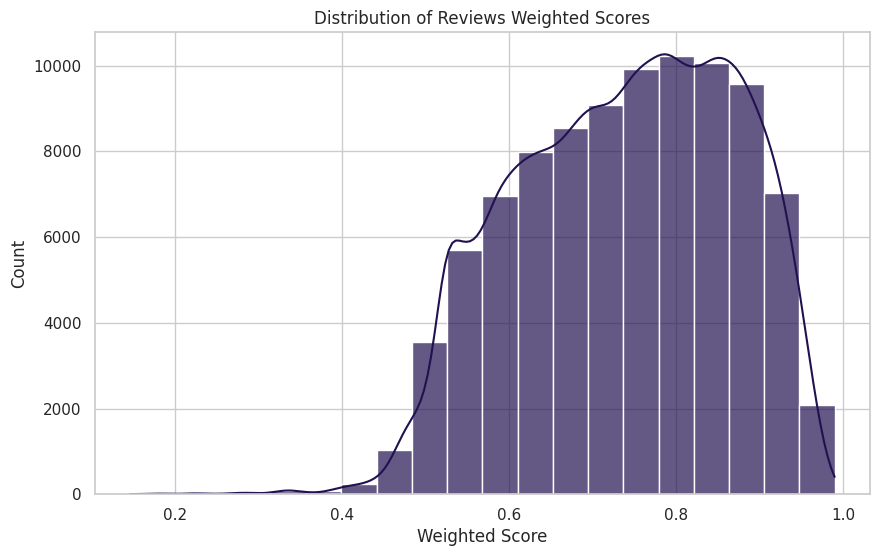

In [ ]:
# distribution of reviews weighted scores

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('magma')

sns.histplot(data=review_df, x="weighted_score", bins=20, kde=True, alpha=0.7)
plt.xlabel("Weighted Score")
plt.ylabel("Count")
plt.title("Distribution of Reviews Weighted Scores")

plt.show()

In [ ]:
# top rated games using average weighted score

avg_score_df = review_df.groupby(['appid'])['weighted_score'].mean().reset_index()
avg_score_df = avg_score_df.sort_values(by='weighted_score', ascending=False).reset_index()

filtered_game_data_df = game_data_df[['appid', 'game']].astype(str)
avg_score_df = pd.merge(avg_score_df, filtered_game_data_df, on='appid', how='left')

avg_score_df = avg_score_df[['appid', 'game', 'weighted_score']]

avg_score_df

,appid,game,weighted_score
0,413150,Stardew Valley,0.950101
1,275850,No Man's Sky,0.948170
2,1086940,Baldur's Gate 3,0.945363
3,1174180,Red Dead Redemption 2,0.940717
4,1237970,Titanfall 2,0.940556
...,...,...,...
935,495910,Dungeon Fighter Online,0.478909
936,478980,Mansions of Madness,0.476144
937,443110,Armored Warfare,0.471698
938,2394590,Just Survive,0.460175


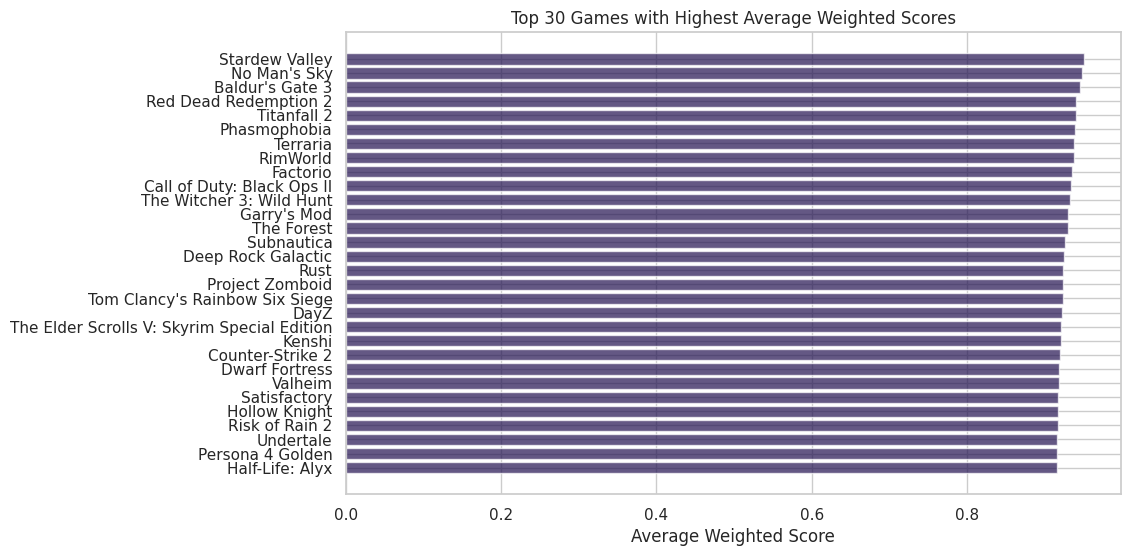

In [ ]:
# visualizing top rated games

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('magma')

top_games = avg_score_df.head(30)

plt.barh(top_games['game'], top_games['weighted_score'], alpha=0.7)
plt.xlabel('Average Weighted Score')
plt.title('Top 30 Games with Highest Average Weighted Scores')
plt.gca().invert_yaxis()  # invert the y-axis so the highest score is at the top
plt.show()

In [ ]:
# save to csv

review_df.to_csv("/content/datasets/game_review_data.csv", index=True, encoding='utf-8-sig')

### Linear Regression Analysis
Relationship between the playtime at review and review weighted score

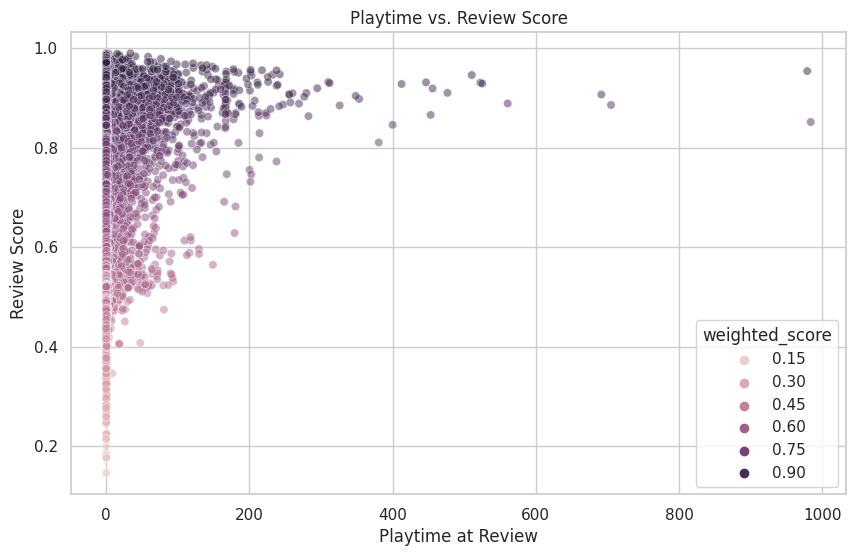

In [ ]:
# plotting the relationship

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('magma')

sns.scatterplot(data=review_df, x="playtime_at_review", y="weighted_score", alpha=0.5, hue='weighted_score')

plt.xlabel("Playtime at Review")
plt.ylabel("Review Score")
plt.title("Playtime vs. Review Score")

plt.show()

In [ ]:
# is there a significant correlation between playtime_at_review and weighted_score?

x = review_df['playtime_at_review']
y = review_df['weighted_score']

corr_coef, p_value = pearsonr(x, y)
print("Pearson's correlation between playtime at review and weighted score:", corr_coef, "\tp-value:", round(p_value, 4))
print("There is a significant weak positive relationship between playtime and weighted score.\n\n")

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

Pearson's correlation between playtime at review and weighted score: 0.10999059784617012 	p-value: 0.0
There is a significant weak positive relationship between playtime and weighted score.


                            OLS Regression Results                            
Dep. Variable:         weighted_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1129.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.56e-246
Time:                        01:47:05   Log-Likelihood:                 58955.
No. Observations:               92213   AIC:                        -1.179e+05
Df Residuals:                   92211   BIC:                        -1.179e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  